In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [353]:
max_depth = 200.
speed1 = 1480.
speed2 = 100
source_depth = 10.
ray_angles_deg = np.linspace(-30, 30, 10)
dz = 0.01
target_dist = 200.

In [ ]:
def get_speed(depth):
    assert depth <= max_depth
    return speed1 - (speed1 - speed2) * (depth / max_depth)

def get_trajectory(start_angle):
    ca = start_angle
    cr, ct = 0., 0.
    cz = source_depth
    angs, rs, zs, ts = [], [], [], []
    while cr < target_dist:
        angs.append(ca)
        rs.append(cr)
        zs.append(cz)
        ts.append(ct)
        c1 = get_speed(cz)
        cz += np.sign(ca) * dz
        cr += np.fabs(dz * np.tan(ca))
        ct += np.fabs(dz / np.cos(ca) / c1)
        c2 = get_speed(cz)
        sina = c1 / c2 * np.sin(ca)
        if np.fabs(sina) > 1. or np.fabs(cz) < 1e-3 or np.fabs(cz - max_depth) < 1e-3:
            ca = -ca
        else:
            ca = np.arcsin(sina)
    return angs, rs, zs, ts


In [355]:
trajectories = []
for angle in ray_angles_deg:
    trajectories.append(get_trajectory(np.deg2rad(angle)))


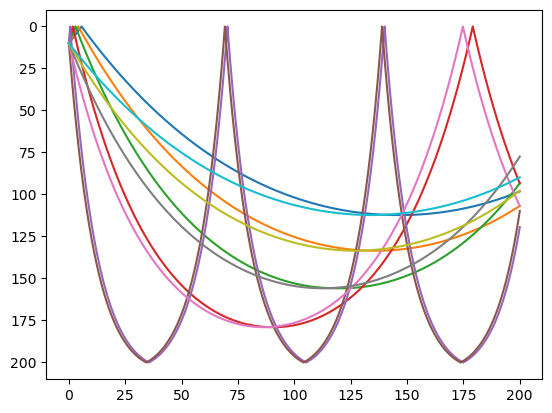

In [356]:
for traj in trajectories:
    plt.plot(traj[1], traj[2])
plt.gca().invert_yaxis()